# Lab 1

## Import libs

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import math

## Read data

In [25]:
df = pd.read_excel('/Users/dkravchenko/Jupyter_Notebookes/MathStat/lab1/data.xlsx')
df.head(10)

,reading score,writing score
0,47,41
1,71,67
2,73,73
3,86,82
4,100,100
5,86,82
6,75,79
7,52,43
8,48,48
9,71,77


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   reading score  200 non-null    int64
 1   writing score  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


#### Reading scores series

In [27]:
reading_score = df['reading score'].sort_values()

In [28]:
reading_score.describe()

count    200.000000
mean      68.590000
std       15.711338
min       32.000000
25%       56.750000
50%       68.000000
75%       80.250000
max      100.000000
Name: reading score, dtype: float64

#### Writting scores series

In [29]:
writting_score = df['writing score'].sort_values()

In [30]:
writting_score.describe()

count    200.000000
mean      67.760000
std       16.441228
min       25.000000
25%       55.000000
50%       68.000000
75%       79.000000
max      100.000000
Name: writing score, dtype: float64

## Interval series

### Reading interval serie

#### Intervals parameters

In [39]:
n = reading_score.count()
k = int(n ** (1/2))
r = int(reading_score.max() - reading_score.min())
l = r / k

print('---------------------------')
print('|%-8s %5.d|' % ('Number of elements:', n))
print('---------------------------')
print('|%-8s %4.d|' % ('Number of intervals:', k))
print('---------------------------')
print('|%-8s %8.d|' % ('Range of sample:', r))
print('---------------------------')
print('|%-8s %7.1f|' % ('Intervals length:', l))
print('---------------------------')

---------------------------
|Number of elements:   200|
---------------------------
|Number of intervals:   14|
---------------------------
|Range of sample:       68|
---------------------------
|Intervals length:     4.9|
---------------------------


#### Table creating

##### Intervals

In [40]:
a_i = []
a_i_plus = []

for i in range(k):
    a_i.append(reading_score.min() + l * i)
    a_i_plus.append(reading_score.min() + l * (i + 1))
    
reading_interval = pd.DataFrame({'a_i': a_i,
                                 'a_i+1': a_i_plus})
    
reading_interval.head(k)

,a_i,a_i+1
0,32.000000,36.857143
1,36.857143,41.714286
2,41.714286,46.571429
3,46.571429,51.428571
4,51.428571,56.285714
5,56.285714,61.142857
6,61.142857,66.000000
7,66.000000,70.857143
8,70.857143,75.714286
9,75.714286,80.571429


##### Calculating number of values in intervals

In [41]:
intervals_values = []
values = reading_score.value_counts().sort_index()

for i in range(k):
    if ((i+1) % 2) and (i != (k - 1)):
        intervals_values.append(sum(values.loc[math.ceil(a_i[i]):math.trunc(a_i_plus[i] - 0.01)]))
    else:
        intervals_values.append(sum(values.loc[math.ceil(a_i[i]):math.trunc(a_i_plus[i])]))

reading_interval['values'] = intervals_values
reading_interval.head(k)

,a_i,a_i+1,values
0,32.000000,36.857143,5
1,36.857143,41.714286,4
2,41.714286,46.571429,5
3,46.571429,51.428571,16
4,51.428571,56.285714,20
5,56.285714,61.142857,14
6,61.142857,66.000000,23
7,66.000000,70.857143,24
8,70.857143,75.714286,18
9,75.714286,80.571429,21


##### Adding parameters

In [42]:
M = []
H = []
for value in reading_interval['values']:
    M.append(value / n)
    H.append(value / l)
    
reading_interval['M'] = M
reading_interval['h'] = H
reading_interval.head(k)

,a_i,a_i+1,values,M,h
0,32.000000,36.857143,5,0.025,1.029412
1,36.857143,41.714286,4,0.020,0.823529
2,41.714286,46.571429,5,0.025,1.029412
3,46.571429,51.428571,16,0.080,3.294118
4,51.428571,56.285714,20,0.100,4.117647
5,56.285714,61.142857,14,0.070,2.882353
6,61.142857,66.000000,23,0.115,4.735294
7,66.000000,70.857143,24,0.120,4.941176
8,70.857143,75.714286,18,0.090,3.705882
9,75.714286,80.571429,21,0.105,4.323529


In [43]:
c = []
for i in range(k):
    c.append((a_i[i] + a_i_plus[i]) / 2)
reading_interval['c'] = c
reading_interval.head(k)

,a_i,a_i+1,values,M,h,c
0,32.000000,36.857143,5,0.025,1.029412,34.428571
1,36.857143,41.714286,4,0.020,0.823529,39.285714
2,41.714286,46.571429,5,0.025,1.029412,44.142857
3,46.571429,51.428571,16,0.080,3.294118,49.000000
4,51.428571,56.285714,20,0.100,4.117647,53.857143
5,56.285714,61.142857,14,0.070,2.882353,58.714286
6,61.142857,66.000000,23,0.115,4.735294,63.571429
7,66.000000,70.857143,24,0.120,4.941176,68.428571
8,70.857143,75.714286,18,0.090,3.705882,73.285714
9,75.714286,80.571429,21,0.105,4.323529,78.142857


In [44]:
F = np.cumsum(reading_interval['M'])
reading_interval['F'] = F
reading_interval.head(k)

,a_i,a_i+1,values,M,h,c,F
0,32.000000,36.857143,5,0.025,1.029412,34.428571,0.025
1,36.857143,41.714286,4,0.020,0.823529,39.285714,0.045
2,41.714286,46.571429,5,0.025,1.029412,44.142857,0.070
3,46.571429,51.428571,16,0.080,3.294118,49.000000,0.150
4,51.428571,56.285714,20,0.100,4.117647,53.857143,0.250
5,56.285714,61.142857,14,0.070,2.882353,58.714286,0.320
6,61.142857,66.000000,23,0.115,4.735294,63.571429,0.435
7,66.000000,70.857143,24,0.120,4.941176,68.428571,0.555
8,70.857143,75.714286,18,0.090,3.705882,73.285714,0.645
9,75.714286,80.571429,21,0.105,4.323529,78.142857,0.750


In [45]:
val_1 = []
val_2 = []
for i in range(k):
    val_1.append(reading_interval['c'][i] * reading_interval['values'][i])
    val_2.append(reading_interval['c'][i] ** 2 * reading_interval['values'][i])
reading_interval['c*m'] = val_1
reading_interval['(c^2)*m'] = val_2
reading_interval.head(k)

,a_i,a_i+1,values,M,h,c,F,c*m,(c^2)*m
0,32.000000,36.857143,5,0.025,1.029412,34.428571,0.025,172.142857,5926.632653
1,36.857143,41.714286,4,0.020,0.823529,39.285714,0.045,157.142857,6173.469388
2,41.714286,46.571429,5,0.025,1.029412,44.142857,0.070,220.714286,9742.959184
3,46.571429,51.428571,16,0.080,3.294118,49.000000,0.150,784.000000,38416.000000
4,51.428571,56.285714,20,0.100,4.117647,53.857143,0.250,1077.142857,58011.836735
5,56.285714,61.142857,14,0.070,2.882353,58.714286,0.320,822.000000,48263.142857
6,61.142857,66.000000,23,0.115,4.735294,63.571429,0.435,1462.142857,92950.510204
7,66.000000,70.857143,24,0.120,4.941176,68.428571,0.555,1642.285714,112379.265306
8,70.857143,75.714286,18,0.090,3.705882,73.285714,0.645,1319.142857,96674.326531
9,75.714286,80.571429,21,0.105,4.323529,78.142857,0.750,1641.000000,128232.428571


#### Data evaluation

In [47]:
reading_parameters = {}
E = sum(reading_interval['c*m'] / n)
E_pow_2 = sum(reading_interval['(c^2)*m'] / n)
mode = reading_interval['c'][reading_interval['values'].idxmax()]
median = (reading_interval['c'][int(k / 2)] + reading_interval['c'][int(k / 2 + 1)]) / 2
D = E_pow_2 - E ** 2
p_D = n / (n - 1) * D
stdev = D ** (1/2)
p_stdev = p_D ** (1/2)
reading_parameters.update({'E': E,
                   'E^2': E_pow_2,
                   'Mode': mode,
                   'Median': median,
                   'D': D,
                   'p_D': p_D,
                   'stdev': stdev,
                   'p_stdev': p_stdev})

for key, value in reading_parameters.items():
    print('------------------')
    print('|%-8s %7.2f|' % (key + ':', value))
print('------------------')

------------------
|E:         68.62|
------------------
|E^2:     4950.64|
------------------
|Mode:      68.43|
------------------
|Median:    70.86|
------------------
|D:        241.54|
------------------
|p_D:      242.76|
------------------
|stdev:     15.54|
------------------
|p_stdev:   15.58|
------------------


In [48]:
python_stat_params = {'E': stat.mean(reading_score),
                      'D': stat.variance(reading_score),
                      'Median': stat.median(reading_score),
                      'p_D': stat.pvariance(reading_score),
                      'stdev': stat.stdev(reading_score)}

for key, value in python_stat_params.items():
    print('------------------')
    print('|%-8s %7.2f|' % (key + ':', value))
print('------------------')

------------------
|E:         68.59|
------------------
|D:        246.85|
------------------
|Median:    68.00|
------------------
|p_D:      245.61|
------------------
|stdev:     15.71|
------------------


#### Graphs

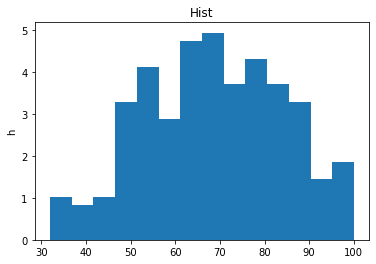

In [49]:
fig, ax = plt.subplots()
ax.set_ylabel('h')
ax.set_title('Hist')
ax.bar(reading_interval['c'], reading_interval['h'], width=5)
plt.show()

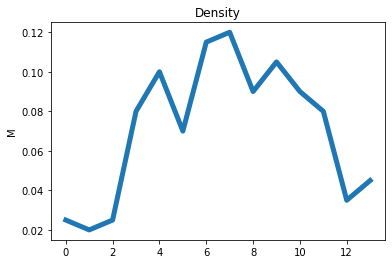

In [50]:
fig, ax = plt.subplots()
ax.set_ylabel('M')
ax.set_title('Density')
ax.plot(reading_interval['M'], linewidth=5.0)
plt.show()

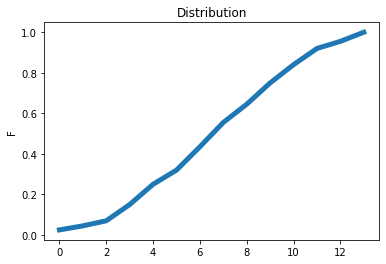

In [51]:
fig, ax = plt.subplots()
ax.set_ylabel('F')
ax.set_title('Distribution')
ax.plot(reading_interval['F'], linewidth=5.0)
plt.show()

### Writting interval serie

#### Intervals parameters

In [63]:
n = writting_score.count()
k = int(n ** (1/2))
r = int(writting_score.max() - writting_score.min())
l = r / k

print('---------------------------')
print('|%-8s %5.d|' % ('Number of elements:', n))
print('---------------------------')
print('|%-8s %4.d|' % ('Number of intervals:', k))
print('---------------------------')
print('|%-8s %8.d|' % ('Range of sample:', r))
print('---------------------------')
print('|%-8s %7.1f|' % ('Intervals length:', l))
print('---------------------------')

---------------------------
|Number of elements:   200|
---------------------------
|Number of intervals:   14|
---------------------------
|Range of sample:       75|
---------------------------
|Intervals length:     5.4|
---------------------------


#### Table creating

##### Intervals

In [64]:
a_i = []
a_i_plus = []

for i in range(k):
    a_i.append(writting_score.min() + l * i)
    a_i_plus.append(writting_score.min() + l * (i + 1))
    
writting_interval = pd.DataFrame({'a_i': a_i,
                                 'a_i+1': a_i_plus})
    
writting_interval.head(k)

,a_i,a_i+1
0,25.000000,30.357143
1,30.357143,35.714286
2,35.714286,41.071429
3,41.071429,46.428571
4,46.428571,51.785714
5,51.785714,57.142857
6,57.142857,62.500000
7,62.500000,67.857143
8,67.857143,73.214286
9,73.214286,78.571429


##### Calculating number of values in intervals

In [65]:
intervals_values = []
values = writting_score.value_counts().sort_index()

for i in range(k):
    if ((i+1) % 2) and (i != (k - 1)):
        intervals_values.append(sum(values.loc[math.ceil(a_i[i]):math.trunc(a_i_plus[i] - 0.01)]))
    else:
        intervals_values.append(sum(values.loc[math.ceil(a_i[i]):math.trunc(a_i_plus[i])]))

writting_interval['values'] = intervals_values
writting_interval.head(k)

,a_i,a_i+1,values
0,25.000000,30.357143,2
1,30.357143,35.714286,1
2,35.714286,41.071429,7
3,41.071429,46.428571,9
4,46.428571,51.785714,17
5,51.785714,57.142857,23
6,57.142857,62.500000,18
7,62.500000,67.857143,20
8,67.857143,73.214286,20
9,73.214286,78.571429,28


##### Adding parameters

In [67]:
M = []
H = []
for value in writting_interval['values']:
    M.append(value / n)
    H.append(value / l)
    
writting_interval['M'] = M
writting_interval['h'] = H
writting_interval.head(k)

,a_i,a_i+1,values,M,h
0,25.000000,30.357143,2,0.010,0.373333
1,30.357143,35.714286,1,0.005,0.186667
2,35.714286,41.071429,7,0.035,1.306667
3,41.071429,46.428571,9,0.045,1.680000
4,46.428571,51.785714,17,0.085,3.173333
5,51.785714,57.142857,23,0.115,4.293333
6,57.142857,62.500000,18,0.090,3.360000
7,62.500000,67.857143,20,0.100,3.733333
8,67.857143,73.214286,20,0.100,3.733333
9,73.214286,78.571429,28,0.140,5.226667


In [68]:
c = []
for i in range(k):
    c.append((a_i[i] + a_i_plus[i]) / 2)
writting_interval['c'] = c
writting_interval.head(k)

,a_i,a_i+1,values,M,h,c
0,25.000000,30.357143,2,0.010,0.373333,27.678571
1,30.357143,35.714286,1,0.005,0.186667,33.035714
2,35.714286,41.071429,7,0.035,1.306667,38.392857
3,41.071429,46.428571,9,0.045,1.680000,43.750000
4,46.428571,51.785714,17,0.085,3.173333,49.107143
5,51.785714,57.142857,23,0.115,4.293333,54.464286
6,57.142857,62.500000,18,0.090,3.360000,59.821429
7,62.500000,67.857143,20,0.100,3.733333,65.178571
8,67.857143,73.214286,20,0.100,3.733333,70.535714
9,73.214286,78.571429,28,0.140,5.226667,75.892857


In [69]:
F = np.cumsum(writting_interval['M'])
writting_interval['F'] = F
writting_interval.head(k)

,a_i,a_i+1,values,M,h,c,F
0,25.000000,30.357143,2,0.010,0.373333,27.678571,0.010
1,30.357143,35.714286,1,0.005,0.186667,33.035714,0.015
2,35.714286,41.071429,7,0.035,1.306667,38.392857,0.050
3,41.071429,46.428571,9,0.045,1.680000,43.750000,0.095
4,46.428571,51.785714,17,0.085,3.173333,49.107143,0.180
5,51.785714,57.142857,23,0.115,4.293333,54.464286,0.295
6,57.142857,62.500000,18,0.090,3.360000,59.821429,0.385
7,62.500000,67.857143,20,0.100,3.733333,65.178571,0.485
8,67.857143,73.214286,20,0.100,3.733333,70.535714,0.585
9,73.214286,78.571429,28,0.140,5.226667,75.892857,0.725


In [70]:
val_1 = []
val_2 = []
for i in range(k):
    val_1.append(writting_interval['c'][i] * writting_interval['values'][i])
    val_2.append(writting_interval['c'][i] ** 2 * writting_interval['values'][i])
writting_interval['c*m'] = val_1
writting_interval['(c^2)*m'] = val_2
writting_interval.head(k)

,a_i,a_i+1,values,M,h,c,F,c*m,(c^2)*m
0,25.000000,30.357143,2,0.010,0.373333,27.678571,0.010,55.357143,1532.206633
1,30.357143,35.714286,1,0.005,0.186667,33.035714,0.015,33.035714,1091.358418
2,35.714286,41.071429,7,0.035,1.306667,38.392857,0.050,268.750000,10318.080357
3,41.071429,46.428571,9,0.045,1.680000,43.750000,0.095,393.750000,17226.562500
4,46.428571,51.785714,17,0.085,3.173333,49.107143,0.180,834.821429,40995.695153
5,51.785714,57.142857,23,0.115,4.293333,54.464286,0.295,1252.678571,68226.243622
6,57.142857,62.500000,18,0.090,3.360000,59.821429,0.385,1076.785714,64414.859694
7,62.500000,67.857143,20,0.100,3.733333,65.178571,0.485,1303.571429,84964.923469
8,67.857143,73.214286,20,0.100,3.733333,70.535714,0.585,1410.714286,99505.739796
9,73.214286,78.571429,28,0.140,5.226667,75.892857,0.725,2125.000000,161272.321429


#### Data evaluation

In [72]:
parameters = {}
E = sum(writting_interval['c*m'] / n)
E_pow_2 = sum(writting_interval['(c^2)*m'] / n)
mode = writting_interval['c'][writting_interval['values'].idxmax()]
median = (writting_interval['c'][k / 2] + writting_interval['c'][k / 2 + 1]) / 2
D = E_pow_2 - E ** 2
p_D = n / (n - 1) * D
stdev = D ** (1/2)
p_stdev = p_D ** (1/2)
parameters.update({'E': E,
                   'E^2': E_pow_2,
                   'Mode': mode,
                   'Median': median,
                   'D': D,
                   'p_D': p_D,
                   'stdev': stdev,
                   'p_stdev': p_stdev})

for key, value in parameters.items():
    print('------------------')
    print('|%-8s %7.2f|' % (key + ':', value))
print('------------------')

------------------
|E:         67.88|
------------------
|E^2:     4872.26|
------------------
|Mode:      75.89|
------------------
|Median:    67.86|
------------------
|D:        264.03|
------------------
|p_D:      265.36|
------------------
|stdev:     16.25|
------------------
|p_stdev:   16.29|
------------------


In [73]:
python_stat_params = {'E': stat.mean(writting_score),
                      'Median': stat.median(writting_score),
                      'D': stat.variance(writting_score),
                      'p_D': stat.pvariance(writting_score),
                      'stdev': stat.stdev(writting_score)}

for key, value in python_stat_params.items():
    print('------------------')
    print('|%-8s %7.2f|' % (key + ':', value))
print('------------------')

------------------
|E:         67.76|
------------------
|Median:    68.00|
------------------
|D:        270.31|
------------------
|p_D:      268.96|
------------------
|stdev:     16.44|
------------------


#### Graphs

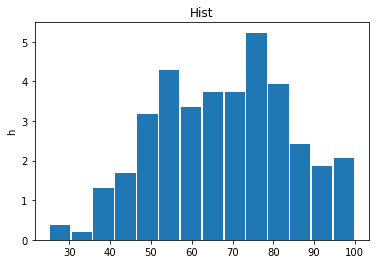

In [74]:
fig, ax = plt.subplots()
ax.set_ylabel('h')
ax.set_title('Hist')
ax.bar(writting_interval['c'], writting_interval['h'], width=5)
plt.show()

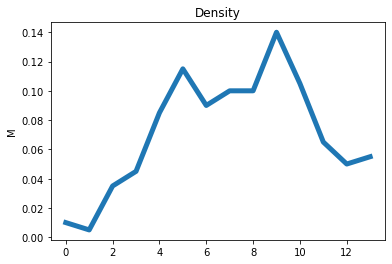

In [75]:
fig, ax = plt.subplots()
ax.set_ylabel('M')
ax.set_title('Density')
ax.plot(writting_interval['M'], linewidth=5.0)
plt.show()

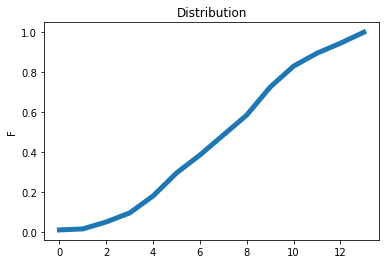

In [76]:
fig, ax = plt.subplots()
ax.set_ylabel('F')
ax.set_title('Distribution')
ax.plot(writting_interval['F'], linewidth=5.0)
plt.show()

## Conclusion

##### В данных 'reading scores' оценки примерно совпадают, отличие присутствует за счет рассмотрения интервальной выборки, округления и погрешности работы.

##### В данных 'writing scores' оценки значения примерно совпадают, отличие присутствует за счет округления и погрешности работы.

#

##### Работу выполнял Кравченко Д.
##### Группа R3338
##### Вариант 3